In [1]:
# 토치 식구들
import torch
import torch.nn as nn
import torch.nn.functional as F

# 넘파이는 가족이다
import numpy as np

# for문 진행현황을 멋있게 보는 방법
from tqdm import tqdm

# loss 추이 찍어볼 때 사용할 것이다.
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters

num_epochs = 10
lr = 0.00001

In [3]:
# GPU 체크
torch.cuda.is_available()

True

In [4]:
# GPU 있으면 GPU 씁시다
device = torch.device('cuda' if torch.cuda.is_available()==True else 'cpu')

In [5]:
# 데이터
# (근무일 수, 얻은 총 피로량) 
# (100, 105), (125, 122), (150, 155), (190, 176), (206, 207)

x = [100, 125, 150, 190, 206]
y = [105, 122, 155, 176, 207]

In [6]:
# 주어진 데이터와 최대로 비슷한 상관 관계를 가장 잘 나타내는 y=Wx를 선형회귀로 추론하는 과정


class Linear_Model(nn.Module):
    def __init__(self):
        super(Linear_Model, self).__init__()
        
        # Hidden Layer 없이 크기 1 Input 받아서 크기 1 Output을 출력
        self.layer1 = nn.Linear(1,1, bias=False) # bias 없이 y=Wx를 추론하고 싶은 것

    def forward(self, x):
        out = self.layer1(x)
        return out

In [7]:
# Loss Graph를 위해 epoch마다 cost를 append할 빈 리스트
Loss_list = []

In [8]:
# 모델 정의 및 gpu에 할당
model = Linear_Model().to(device)

In [9]:
# Optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [10]:
# 데이터 Tensor화 및 gpu에 할당
train_x = torch.Tensor(x).to(device)
train_y = torch.Tensor(y).to(device)

train_x = torch.reshape(train_x, (len(train_x), 1))
train_y = torch.reshape(train_y, (len(train_y), 1))

In [11]:
# tqdm으로 progress 확인을 위해 tqdm 객체 생성
num_e = tqdm(range(num_epochs))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

In [12]:
for epoch in num_e:
    out = model(train_x)

    cost = F.mse_loss(train_y, out).to(device)

    Loss_list.append(cost.item())

    # 학습
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 2 == 0:
    # 5번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, num_epochs, cost.item()
      ))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.41it/s]

Epoch    0/10 Cost: 66668.929688
Epoch    2/10 Cost: 3994.172607
Epoch    4/10 Cost: 281.092285
Epoch    6/10 Cost: 61.116055
Epoch    8/10 Cost: 48.083794


In [13]:
# tqdm 객체 닫음
num_e.close()

In [14]:
# Weight 확인
for weight in model.parameters():
    print(weight)

Parameter containing:
tensor([[0.9861]], device='cuda:0', requires_grad=True)


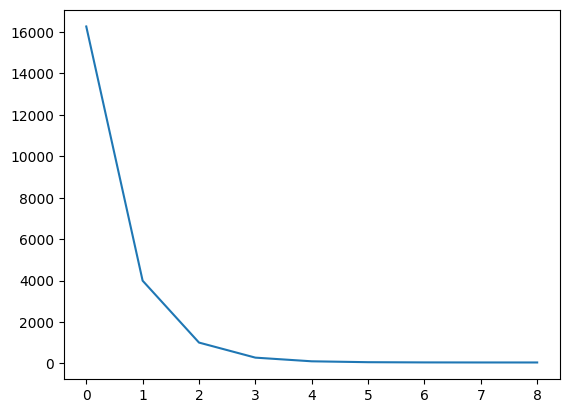

In [15]:
# loss graph 출력

plt.plot(Loss_list[1:])
plt.show()

In [16]:
# 테스트 데이터 넣어보기
model.eval()
a = np.array([[175]]) # model에 넣어줄 때는 (n, 1)꼴로 받아야하기 때문에
print("If", a[0, 0], "is the input, the output is:", model(torch.Tensor(a).to(device)).item())

If 175 is the input, the output is: 172.57594299316406


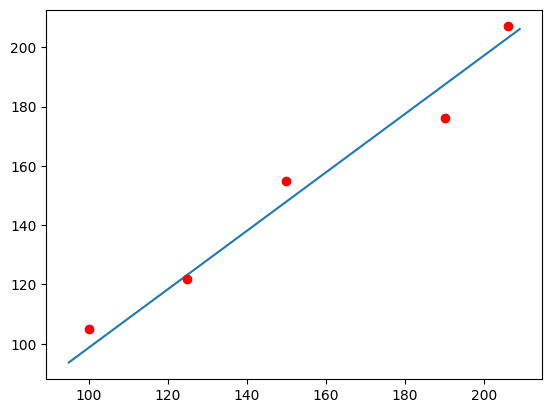

In [17]:
# y = Wx + b에 Sigmoid를 적용한 그래프 그려보기

lista = list(range(95,210,1))
lista = np.array(lista)

plt.plot(lista, weight.item()*lista)
plt.plot(x, y, 'ro')
plt.show()